In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

In [3]:
cc=pd.read_csv('C:/Users/vki001/Documents/Datasets/Fraud Detection/creditcard.csv')

In [4]:
cc.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [6]:
cc.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
cc.shape

(284807, 31)

### Analysing the DataSet

The data set has 31 columns & 281807 rows. This set doesnt have any null values.
We do not have column labels except for the amount column so we do not know what the other columns signify.

#### This is  unsupervised learning problem

##### Our goal is to identify if the transaction is fraud or not, the class column becomes our dependent variable our Y variable.

##### This is classification problem, we will use classification algorithms to build the model.


## Lets  Begin with exploring the datasets

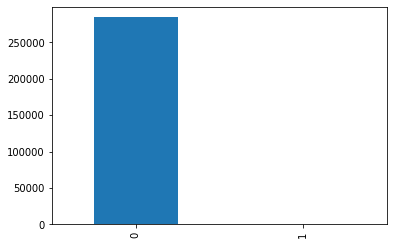

In [8]:
#Analysing the dependent or Y variable

cc['Class'].value_counts().plot(kind='bar')

In [9]:
cc['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
print(f"Non fraudulent transactions:{round(cc['Class'].value_counts()[0]/len(cc['Class'])*100,2)}%")
print(f" fraudulent transactions:{round(cc['Class'].value_counts()[1]/len(cc['Class'])*100,2)}%")

Non fraudulent transactions:99.83%
 fraudulent transactions:0.17%


As we see most of the transactions (99%) are Non Fraud & only 1% are Fraudulent transactions. This means this is largely imbalanced dataset. 

If we use this dataset to build the model we might get lot of errors & we might overfit since it will assume most of the transaction Non fraudulent.



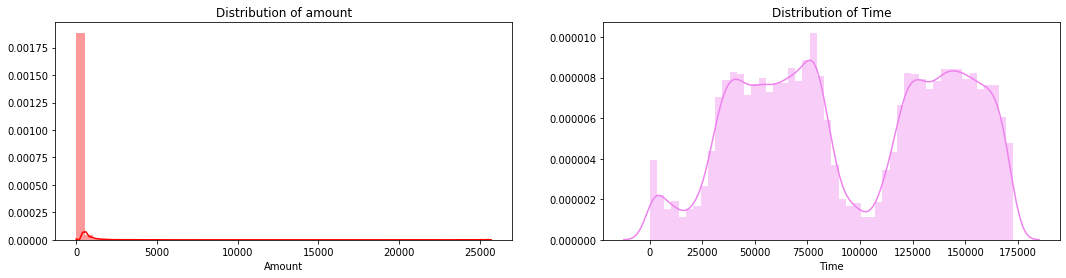

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

#Lets analyse the 'Amount' column
sns.distplot(cc['Amount'],ax=ax[0],color='r')
ax[0].set_title('Distribution of amount')

#now seeing the time distribution
sns.distplot(cc['Time'],ax=ax[1],color='violet')
ax[1].set_title('Distribution of Time')

plt.show()

We can see that above distributions are skewed & we need use the techniques to reduce the skewness. We will see how to normalise the data in later stages.

### Dealing with Imbalanced Data

As we see the data is hugely imbalance, this might lead to overfitting problem. To make out model work accurately we will need to balance the fraudulent & non- fruadulent transactions which means we need to have equal amount of both classes.

To balance the data, we will take the sub-sample of both fraudulent & non-fraudulent transactions & try to build the prediction models. Since we have only 492 fradulent transactions, we will randomply pick 492 non-fraudulent transactions to create a balanced sub-sample #or dataframe



### Scaling
If we observe all the other variables are scaled except the Amount & time labels, we will first scale these variables using Standard Scalar



In [42]:
from sklearn.preprocessing import StandardScaler
std_slr= StandardScaler()
cc['sld_amt']=std_slr.fit_transform(cc['Amount'].values.reshape(-1,1))
cc['sld_time']=std_slr.fit_transform(cc['Time'].values.reshape(-1,1))

In [43]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,sld_amt,sld_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996541


In [49]:
#dropping the old columns
#cc.drop(['Amount','Time'],axis=1, inplace=True)
cc.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,sld_amt,sld_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Now we have scaled all the labels.

Next we have to look into imbalance data before we start building the model. We need to have equal Fruad & Non-fruad transactions. In order to achieve this, we will have to use Ramdon sampling techniques & scale the dataset to get the balanced dataset of Y variable classes.This will give us new dataset.

Remember, we have to test our model on the original dataset not on new dataset achieved through sampling.

### First lets split the dataset

In [78]:
x=cc.drop('Class',axis=1)
y=cc['Class']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [85]:
#Initially lets identify how the model built on imbalanced dataset will perform

#Using Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9782662125627611


In [91]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
from sklearn.metrics import confusion_matrix,accuracy_score
acc=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print("Accuracy:",acc)
print(cm)

Accuracy: 0.9782662125627611
[[55659  1216]
 [   22    65]]


##### Note that above accuracy score can be misleading though we have got 98% accuracy,since the data is hugely imbalanced.

Like Said earlier, we need to balance the samples. we have 492 fraud transactions and we need only 492 non-fraud transactions.
We will perform Random Under Sampling technique to achieve the balanced sample.

### Random Undersampling

In [102]:
#shuffle the data before creating the sub-sample

cc=cc.sample(frac=1) #this will randomly select all the data from dataset

#extract the fraudulent & non-fraudulent transactions
fraud_df=cc.loc[cc['Class']==1]
nonfraud_df=cc.loc[cc['Class']==0][:492] #using slicing method to select the 492 samples

#combine the datasets
new_df=pd.concat([fraud_df,nonfraud_df])
new_df.shape

(984, 31)

In [103]:
#check the distribution of classes
new_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [104]:
#Checking the correlation between the variables. We need to analyse how these variables are correlated with Y variable.
new_df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,sld_amt,sld_time
105178,1.140431,1.134243,-1.429455,2.012226,0.622800,-1.152923,0.221159,0.037372,0.034486,-1.879644,...,-0.891627,-0.160578,-0.108326,0.668374,-0.352393,0.071993,0.113684,1,-0.349231,-0.535289
245347,0.051075,1.310427,0.733222,2.620282,1.402358,0.528489,1.086014,-0.146423,-1.724333,1.280167,...,0.766927,-0.189624,0.766853,-0.141401,-0.077278,-0.297595,-0.221816,1,-0.343354,1.219173
86155,-2.756007,0.683821,-1.390169,1.501887,-1.165614,-0.131207,-1.478741,-0.246922,-0.100523,-2.301110,...,0.611027,0.174864,-0.502151,-0.174713,1.179242,-1.166315,0.821215,1,0.052576,-0.709775
208651,0.630579,1.183631,-5.066283,2.179903,-0.703376,-0.103614,-3.490350,1.094734,-0.717418,-5.179935,...,0.043807,0.102711,-0.601505,0.127371,-0.163009,0.853792,0.356503,1,-0.195505,0.892796
61787,-1.554216,1.694229,-0.903334,2.425436,-2.899787,0.133028,-0.286226,0.555945,-1.394918,-2.892612,...,0.733393,0.202350,0.492054,-0.183791,-0.199917,0.395201,0.027693,1,1.086082,-0.944003


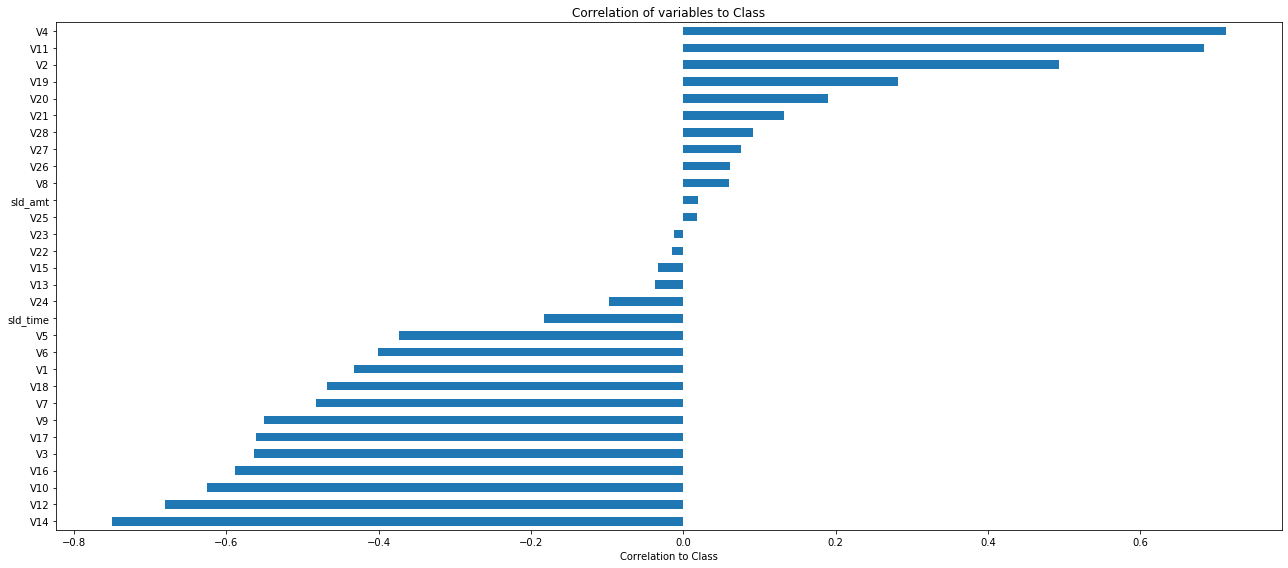

In [106]:
corr=new_df.corr()

plt.figure(figsize=(18,8))
corr["Class"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of variables to Class")
plt.xlabel("Correlation to Class")
plt.tight_layout()
plt.show()

Text(0.5, 1, 'Correlation of Variables with Class')

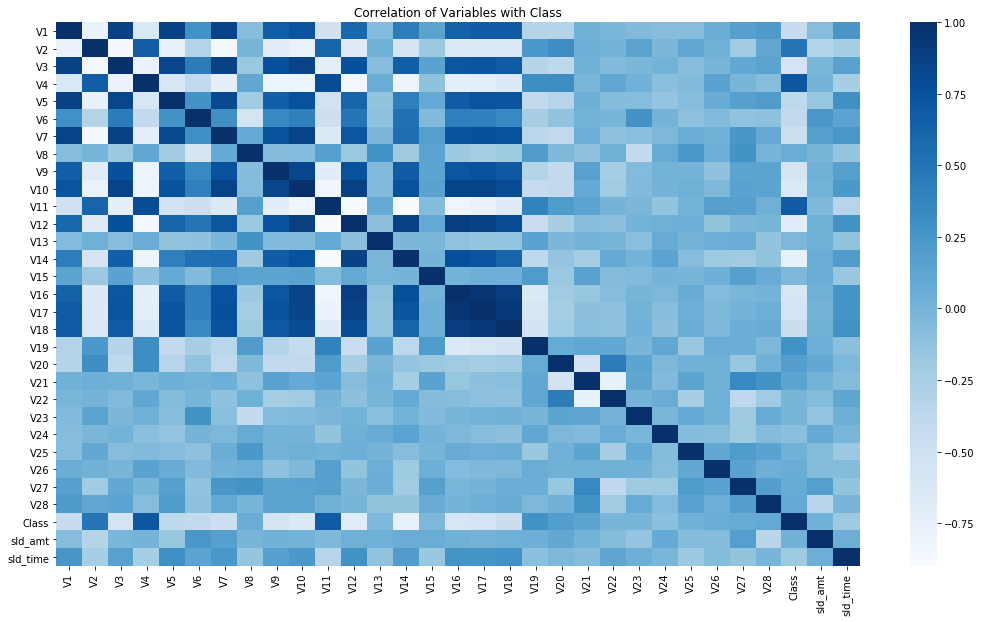

In [107]:
plt.figure(figsize=(18,10))
sns.heatmap(corr,annot=False, cmap="Blues")
plt.title("Correlation of Variables with Class")